In [ ]:
%load_ext autoreload
%autoreload 2

import pymc3 as pm
import numpy as np
import math as m
import matplotlib.pyplot as plt
import dive 
import deerlab as dl
from scipy.io import loadmat

## Load and display data

In [ ]:
loaded_data = np.genfromtxt("../../data/2g_Pid-3223_Sid-36787.dat", skip_header = 1, delimiter = ',')
Pid = 3223
t = loaded_data[:,0]
Vexp = loaded_data[:,1]

In [ ]:
plt.plot(t, Vexp)
plt.xlabel('t (µs)')
plt.ylabel('V')
plt.show()

P0s = loadmat('..\..\data\edwards_testset\distributions_2LZM.mat')['P0']
rref = np.squeeze(loadmat('..\..\data\edwards_testset\distributions_2LZM.mat')['r0'])
Pref = P0s[Pid-1,:]

plt.plot(rref, Pref)
plt.xlabel('r (nm)')
plt.ylabel(r'$P~(nm^{-1})$')
plt.show()



## Regularization

In [9]:
pars = {"method": 'regularization', "r": np.linspace(2,6,400)}

model = dive.model(t, Vexp, pars)

MCMCparameters = {"draws": 5000,"tune": 2000, "chains": 4, 'cores': 1}
trace = dive.sample(model,MCMCparameters)

Sequential sampling (4 chains in 1 job)
CompoundStep
>SamplePfromV: [P]
>randDelta: [delta]
>NUTS: [k, V0, lamb, sigma]


V0: 1.0 delta: 10000.0 k: 0.25 lamb: 0.393939393939394 sigma: 0.3499999999999999
V0: 1.0 delta: 14795.351000083383 k: 0.25 lamb: 0.393939393939394 sigma: 0.3499999999999999
V0: 1.0 delta: 25043.896626363636 k: 0.25 lamb: 0.393939393939394 sigma: 0.3499999999999999
V0: 1.0 delta: 37547.96141089263 k: 0.25 lamb: 0.393939393939394 sigma: 0.3499999999999999
V0: 1.025026284080956 delta: 49377.9426264739 k: 0.24046950464926142 lamb: 0.38740043572107896 sigma: 0.3235742713163395
V0: 1.034750966165304 delta: 58907.541365479825 k: 0.23615737793870728 lamb: 0.38553717048246344 sigma: 0.3199731106627323
V0: 1.0456085708047733 delta: 93613.5149718713 k: 0.2347415533429769 lamb: 0.3890999270869141 sigma: 0.3063247784292452
V0: 1.0688284318904646 delta: 124892.94375974662 k: 0.23414380776549912 lamb: 0.38562801084678644 sigma: 0.29182641885670463
V0: 1.09542244660892 delta: 147547.09451599728 k: 0.22625455987777812 lamb: 0.38439774423576223 sigma: 0.2536409498931168
V0: 1.2289145151215586 delta: 159

V0: 1.0 delta: 10000.0 k: 0.25 lamb: 0.393939393939394 sigma: 0.3499999999999999
V0: 1.0 delta: 19408.43163021278 k: 0.25 lamb: 0.393939393939394 sigma: 0.3499999999999999
V0: 1.0 delta: 30379.829322593574 k: 0.25 lamb: 0.393939393939394 sigma: 0.3499999999999999
V0: 1.0 delta: 47515.96543626332 k: 0.25 lamb: 0.393939393939394 sigma: 0.3499999999999999
V0: 1.0017664538976097 delta: 54978.547661062505 k: 0.24955579032484565 lamb: 0.39389803521294836 sigma: 0.35023313134156314
V0: 1.0050207458125926 delta: 85446.58807899206 k: 0.25000416646146123 lamb: 0.39318768262681836 sigma: 0.3501550418222164
V0: 1.025865917253467 delta: 120939.2927148708 k: 0.24452207710782886 lamb: 0.3896334234730277 sigma: 0.341884800399528
V0: 1.0342024330188018 delta: 166655.1076743576 k: 0.24662956161016455 lamb: 0.3902458712703987 sigma: 0.3350736977358075
V0: 1.034692287375253 delta: 170482.0768524711 k: 0.24310733963566925 lamb: 0.39004814320924924 sigma: 0.3220858773780974
V0: 1.0844649238592943 delta: 246

V0: 1.0 delta: 10000.0 k: 0.25 lamb: 0.393939393939394 sigma: 0.3499999999999999
V0: 1.0 delta: 22328.346430711706 k: 0.25 lamb: 0.393939393939394 sigma: 0.3499999999999999
V0: 1.0 delta: 27620.888580641804 k: 0.25 lamb: 0.393939393939394 sigma: 0.3499999999999999
V0: 1.158056693644961 delta: 41505.8621629399 k: 0.238971646513145 lamb: 0.39342145181622784 sigma: 0.28584248809383694
V0: 1.1564261555948476 delta: 54091.91812995989 k: 0.23135552323710654 lamb: 0.38744981460918376 sigma: 0.20820382309727029
V0: 1.1564261555948476 delta: 59511.88104083404 k: 0.23135552323710654 lamb: 0.38744981460918376 sigma: 0.20820382309727029
V0: 1.1727083187622902 delta: 76109.62236589091 k: 0.23252852684642522 lamb: 0.3862466160051615 sigma: 0.18460957374259654
V0: 1.1764483496787062 delta: 91366.40538556567 k: 0.2209074109104807 lamb: 0.38831023549043475 sigma: 0.17879513299718325
V0: 1.1696171219362408 delta: 95095.4219841388 k: 0.21556211118271512 lamb: 0.38649701895396565 sigma: 0.1655694933990302

V0: 1.0 delta: 10000.0 k: 0.25 lamb: 0.393939393939394 sigma: 0.3499999999999999
V0: 1.0 delta: 14425.609424368236 k: 0.25 lamb: 0.393939393939394 sigma: 0.3499999999999999
V0: 1.0 delta: 19174.10783033352 k: 0.25 lamb: 0.393939393939394 sigma: 0.3499999999999999
V0: 1.108590951906453 delta: 30508.07753796086 k: 0.24968731115628065 lamb: 0.3822832050706889 sigma: 0.25364649396060607
V0: 1.1297169127244644 delta: 36484.252467452774 k: 0.24468640374320022 lamb: 0.37617355035637123 sigma: 0.23573097663340908
V0: 1.2123886881136319 delta: 41084.63997907858 k: 0.21870772828582474 lamb: 0.3641100024476288 sigma: 0.14115469245792342
V0: 1.2123886881136319 delta: 39259.4262391255 k: 0.21870772828582474 lamb: 0.3641100024476288 sigma: 0.14115469245792342
V0: 1.1774827832757273 delta: 35140.76941988758 k: 0.21386144228623746 lamb: 0.3643916065916892 sigma: 0.13537749423255205
V0: 1.1470777855827854 delta: 30096.03913117058 k: 0.20016658774499055 lamb: 0.36201411205824896 sigma: 0.123166018466268

Sampling 4 chains for 2_000 tune and 5_000 draw iterations (8_000 + 20_000 draws total) took 25660 seconds.
There were 29 divergences after tuning. Increase `target_accept` or reparameterize.
There were 33 divergences after tuning. Increase `target_accept` or reparameterize.
There were 33 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9451201969267775, but should be close to 0.8. Try to increase the number of tuning steps.
There were 38 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


mean         sd    hdi_3%    hdi_97%  mcse_mean  mcse_sd  \
k          0.059      0.005     0.050      0.067      0.000    0.000   
λ          0.418      0.008     0.403      0.434      0.000    0.000   
V₀         1.015      0.011     0.995      1.036      0.000    0.000   
σ          0.029      0.007     0.018      0.042      0.001    0.000   
δ      23470.773  10419.183  5627.416  42849.886    642.994  455.171   
lg(α)      0.615      0.020     0.577      0.654      0.000    0.000   

       ess_bulk  ess_tail  r_hat  
k        2142.0    1900.0   1.00  
λ        1565.0    1849.0   1.00  
V₀       2056.0    2732.0   1.00  
σ         229.0     206.0   1.01  
δ         223.0     197.0   1.01  
lg(α)    1700.0    6003.0   1.00

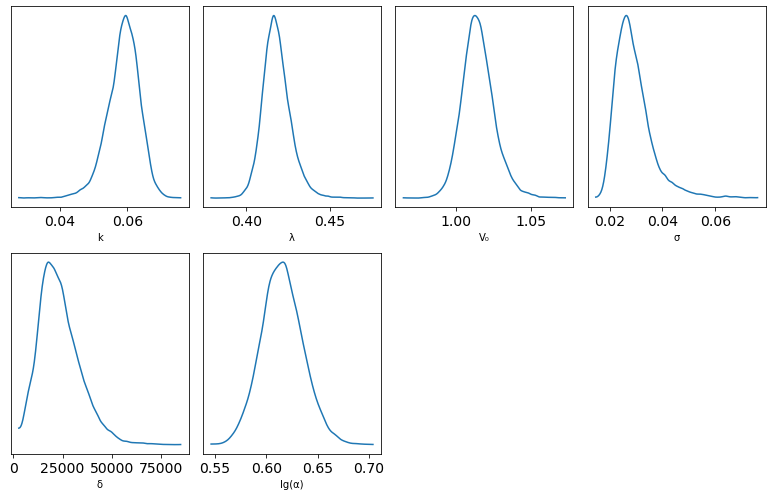

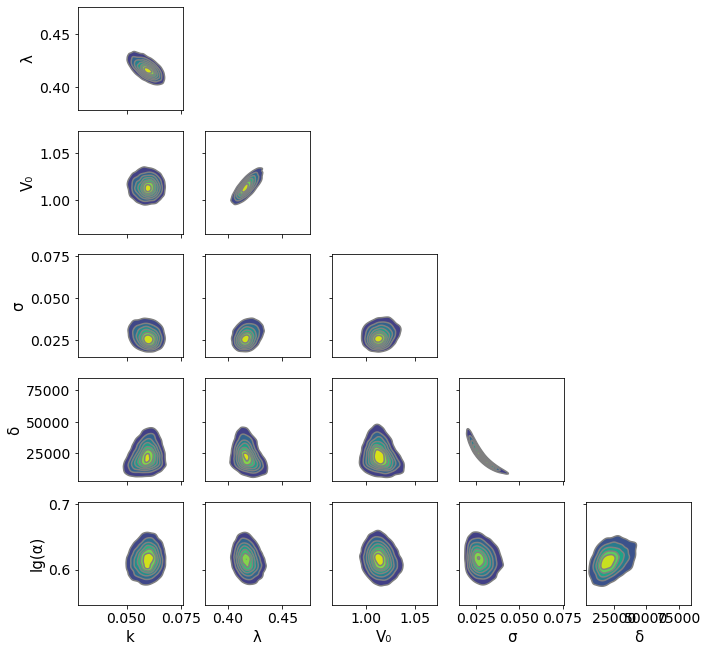

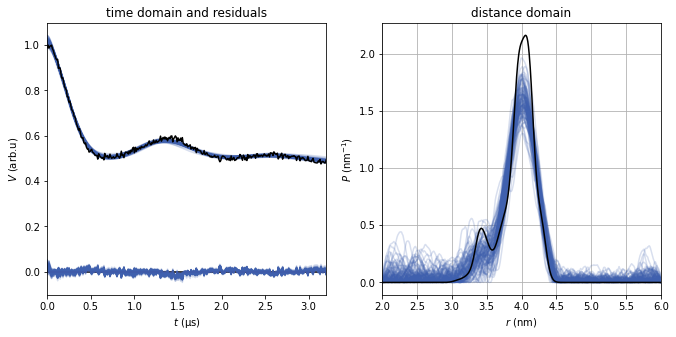

In [10]:
dive.summary(trace, model, Pid = Pid)  

In [11]:
pars = {"method": 'regularization', "r": np.linspace(2,6,500)}

model = dive.model(t, Vexp, pars)

MCMCparameters = {"draws": 7000,"tune": 2000, "chains": 4, 'cores': 4}
trace_parallel = dive.sample(model,MCMCparameters)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>SamplePfromV: [P]
>randDelta: [delta]
>NUTS: [k, V0, lamb, sigma]


Sampling 4 chains for 2_000 tune and 7_000 draw iterations (8_000 + 28_000 draws total) took 34878 seconds.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
There were 12 divergences after tuning. Increase `target_accept` or reparameterize.
There were 401 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5962437512088062, but should be close to 0.8. Try to increase the number of tuning steps.
There were 46 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


mean         sd     hdi_3%    hdi_97%  mcse_mean  mcse_sd  \
k          0.060      0.004      0.053      0.067      0.000    0.000   
λ          0.416      0.007      0.403      0.429      0.000    0.000   
V₀         1.013      0.009      0.997      1.030      0.000    0.000   
σ          0.024      0.005      0.016      0.033      0.000    0.000   
δ      39117.435  15769.400  12348.557  68850.700    803.135  568.332   
lg(α)      0.652      0.021      0.614      0.689      0.000    0.000   

       ess_bulk  ess_tail  r_hat  
k        1973.0    2053.0    1.0  
λ        1508.0    1916.0    1.0  
V₀       1919.0    2544.0    1.0  
σ         375.0     550.0    1.0  
δ         359.0     517.0    1.0  
lg(α)    2020.0    4240.0    1.0

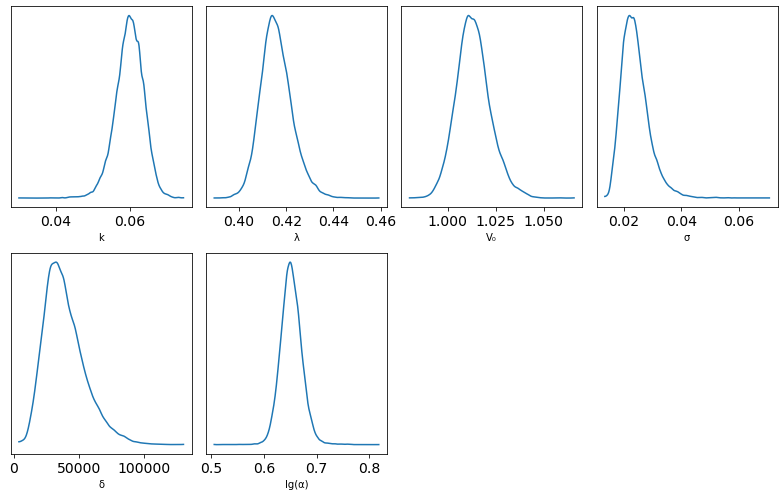

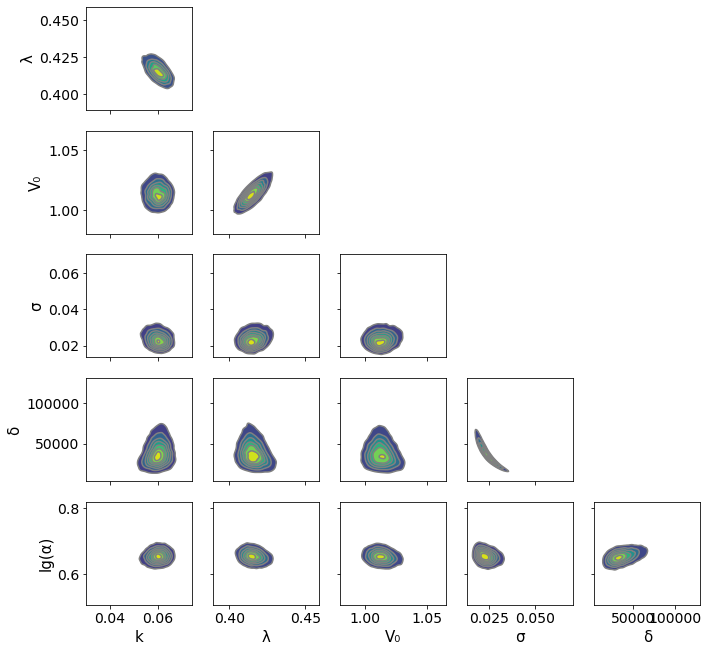

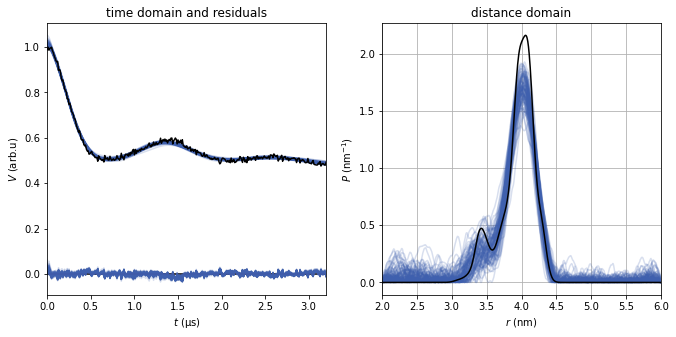

In [12]:
dive.summary(trace_parallel, model, Pid = Pid)  

## Twos Gaussians

In [7]:
pars_gauss = {"method": 'gaussian', "r": np.linspace(2,6,200), 'nGauss': 2}

model_gauss = dive.model(t, Vexp, pars_gauss)

MCMCparameters = {"draws": 5000,"tune": 1000, "chains": 4, 'cores': 4}
trace_gauss = dive.sample(model_gauss,MCMCparameters)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, V0, lamb, k, a, w, r0_rel]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 466 seconds.
The acceptance probability does not match the target. It is 0.9509480813078796, but should be close to 0.8. Try to increase the number of tuning steps.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
r0[0]  3.590  0.235   3.412    4.000      0.116    0.089       7.0      28.0   
r0[1]  4.020  0.016   3.987    4.040      0.008    0.006       7.0      28.0   
w[0]   0.313  0.119   0.063    0.500      0.042    0.031       8.0      27.0   
w[1]   0.434  0.131   0.319    0.699      0.064    0.049       7.0      27.0   
a[0]   0.209  0.081   0.130    0.378      0.033    0.024       8.0      30.0   
a[1]   0.791  0.081   0.622    0.870      0.033    0.025       8.0      30.0   
k      0.065  0.002   0.062    0.068      0.001    0.000       8.0      29.0   
λ      0.400  0.003   0.395    0.404      0.001    0.001       8.0      27.0   
V₀     0.998  0.005   0.987    1.005      0.003    0.002       7.0      27.0   
σ      0.008  0.001   0.007    0.010      0.000    0.000       7.0      26.0   

       r_hat  
r0[0]   1.53  
r0[1]   1.53  
w[0]    1.45  
w[1]    1.53  
a[0]    1.43  
a[1]    1.43  
k       1.41  
λ       1.39  
V₀      1.53  
σ       1.53

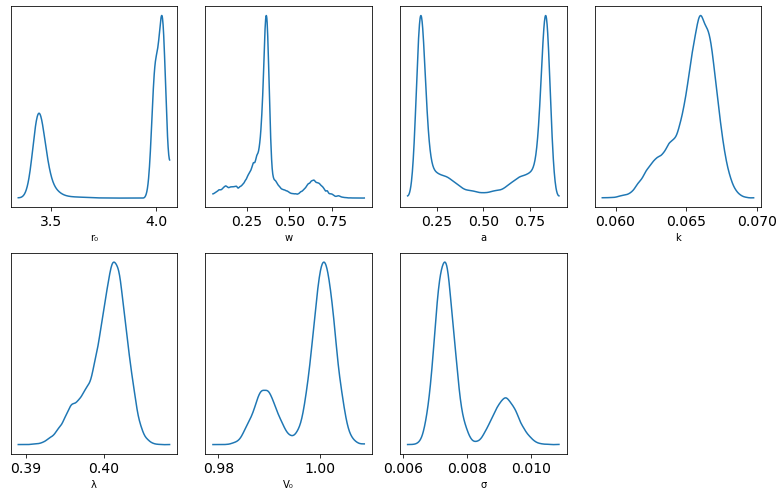

C:\Users\stephan\miniconda3\envs\pymc3\lib\site-packages\arviz\plots\backends\matplotlib\pairplot.py:238: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of resulting pair plots with these variables, generating only a 8x8 grid
  warnings.warn(


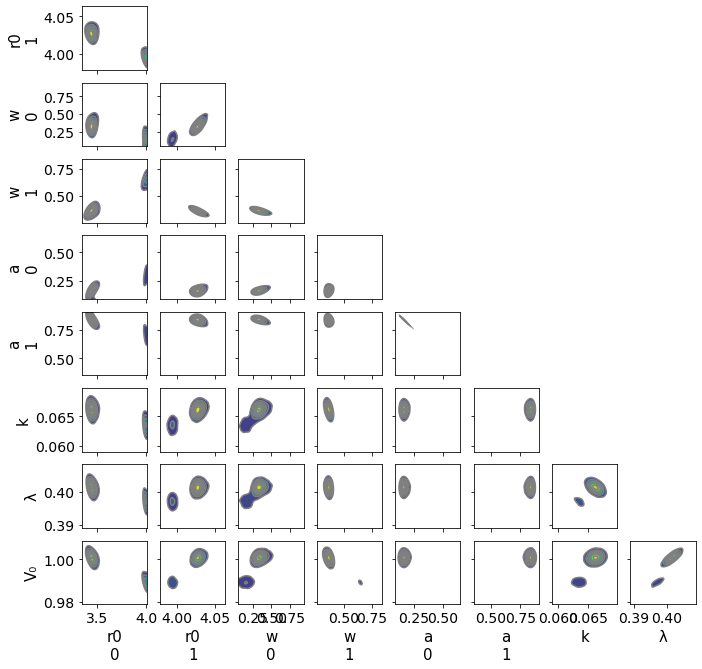

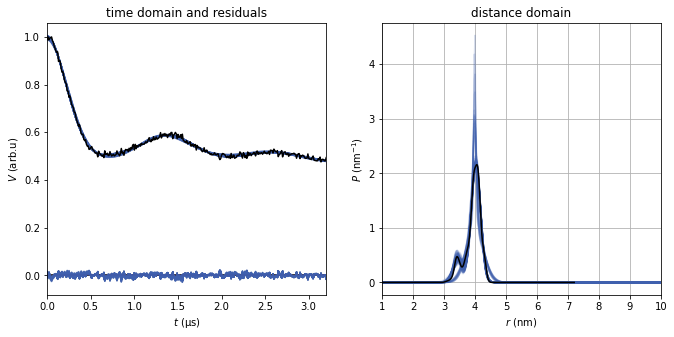

In [8]:
dive.summary(trace_gauss, model_gauss, Pid = Pid)  